### QA Assessments

In [ ]:
#!apt-get install chromium chromium-driver

In [169]:
#!micromamba install -y -c conda-forge selenium

In [61]:
from pathlib import Path
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By

In [162]:
file = ''
our_data_coverage = pd.read_csv(file)

In [166]:
def get_protected_area_extent(iso: str):
    URL = f"https://www.protectedplanet.net/country/{iso}"

    # Define the Chrome webdriver options
    opt = webdriver.ChromeOptions()
    opt.add_argument("--headless")
    opt.add_argument("--no-sandbox")
    opt.add_argument("--disable-dev-shm-usage")

    # Pass the defined options objects to initialize the web driver
    service = webdriver.ChromeService(executable_path="/usr/bin/chromedriver")
    # driver = webdriver.Chrome(options=opt)
    driver = webdriver.Chrome(
        service=service,
        options=opt
    )
    driver.get(URL)
    time.sleep(1)

    data = driver.find_elements(By.CLASS_NAME, "card__stat")

    marine_data = list(filter(lambda x: "Marine and coastal area covered" in x.text, data ))
    if len(marine_data) == 1:
        return marine_data[0].text.split("\n")[0][:-3]
    else:
        return None

In [167]:
our_2023 = our_data_coverage[our_data_coverage["year"] == 2023].reset_index(drop=True)
our_2023

,year,iso_3,protectedArea
0,2023,ABNJ,1442656.56
1,2023,AF,805198.20
2,2023,AGO,0.05
3,2023,ALB,139.01
4,2023,ARE,6256.92
...,...,...,...
147,2023,VUT,1384.39
148,2023,WA,17462.58
149,2023,WSM,99.02
150,2023,YEM,1271.95


In [168]:
compare = our_2023.assign(protectedAreaExtent=our_2023["iso_3"].apply(get_protected_area_extent))

In [180]:
compare

,year,iso_3,protectedArea,protectedAreaExtent
0,2023,ABNJ,1442656.56,None
1,2023,AF,805198.20,None
2,2023,AGO,0.05,67
3,2023,ALB,139.01,318
4,2023,ARE,6256.92,"6,281"
...,...,...,...,...
147,2023,VUT,1384.39,48
148,2023,WA,17462.58,None
149,2023,WSM,99.02,191
150,2023,YEM,1271.95,"2,562"


TypeError: 'value' must be an instance of str or bytes, not a float

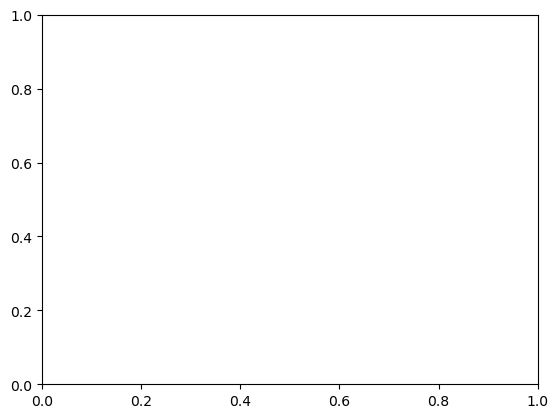

In [179]:
compare[compare.notnull()].plot.scatter(x="protectedAreaExtent", y="protectedArea", c="DarkBlue")